<a href="https://colab.research.google.com/github/kuznetdim/Analyst/blob/main/%D0%9C%D0%B0%D1%80%D0%BA%D0%B5%D1%82%D0%B8%D0%BD%D0%B3%D0%9F%D0%BE%D0%BA%D0%B0%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Необходимо помочь маркетологам оптимизировать маркетинговые затраты.  
У нас в распоряжении есть данные от Яндекс.Афиши за год, 
лог сервера с данными о посещениях сайта,
выгрузка всех заказов за этот период,
статистика рекламных расходов.
    
Какие источники/платформы вы бы порекомендовали?  
Объясните свой выбор: на какие метрики вы ориентируетесь? Почему? Какие выводы вы сделали, узнав значение метрик?
    
1. [Шаг 1. Обзор данных. Откроем файл с данными и изучим общую информацию](#step1)  
2. [Шаг 2. Как люди пользуются продуктом](#step2)  
3. [Шаг 3. Продажи](#step7)  
    - Расчет LTV, среднего чека, различных метрик.
4. [Шаг 4. Маркетинг](#step12)   
    - Стоимость привлечения, окупаемость расходов (ROI)  
5. [Шаг 5. Вывод](#step16)      



## Шаг 1. Обзор данных. Откроем файлы с данными и изучим общую информацию <a id="step1"></a>   

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
from scipy import stats as st

In [ ]:
costs = pd.read_csv('E:/Яндекс_DA/Модуль_2_DA/Спринт_2_БизнАн/costs.csv')
orders_log = pd.read_csv('E:/Яндекс_DA/Модуль_2_DA/Спринт_2_БизнАн/orders_log.csv')
visits_log = pd.read_csv('E:/Яндекс_DA/Модуль_2_DA/Спринт_2_БизнАн/visits_log.csv')

In [ ]:
display(costs)

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [ ]:
display(orders_log)

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [ ]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Buy Ts   50415 non-null  object 
 1   Revenue  50415 non-null  float64
 2   Uid      50415 non-null  uint64 
dtypes: float64(1), object(1), uint64(1)
memory usage: 1.2+ MB


In [ ]:
display(visits_log)

,Device,End Ts,Source Id,Start Ts,Uid
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168
...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485


In [ ]:
visits_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Device     359400 non-null  object
 1   End Ts     359400 non-null  object
 2   Source Id  359400 non-null  int64 
 3   Start Ts   359400 non-null  object
 4   Uid        359400 non-null  uint64
dtypes: int64(1), object(3), uint64(1)
memory usage: 13.7+ MB


<div style="border:solid blue 2px; padding: 20px">
В данных нет пропусков. Предобработка не требуется.
</div>

# Шаг 2. Продукт <a id="step2"></a> 

Для изучения продукта нам необходима таблица `visits_log`

## 1) Сколько людей пользуются в день, неделю, месяц? <a id="step3"></a>
(т.н. DAU, WAU,
MAU. Важно учитывать кол-во уникальных пользователей)

Приводим типы данных

In [ ]:
visits_log['ses_date_start'] = pd.to_datetime(visits_log['Start Ts'])
visits_log['ses_date_end'] = pd.to_datetime(visits_log['End Ts'])

In [ ]:
visits_log['session_year']  = visits_log['ses_date_start'].dt.year
visits_log['session_month'] = visits_log['ses_date_start'].dt.month
visits_log['session_week']  = visits_log['ses_date_start'].dt.week
visits_log['session_date'] = visits_log['ses_date_start'].dt.date

In [ ]:
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,12,52,2017-12-27


In [ ]:
dau_total = visits_log.groupby('session_date').agg({'Uid': 'nunique'}).mean()

In [ ]:
print(int(dau_total))

907


In [ ]:
wau_total = visits_log.groupby(['session_year','session_week']).agg({'Uid': 'nunique'}).mean()

In [ ]:
wau_total

Uid    5716.245283
dtype: float64

In [ ]:
mau_total = visits_log.groupby(['session_year','session_month']).agg({'Uid': 'nunique'}).mean()

In [ ]:
print('DAU = ',int(dau_total))
print('WAU = ',int(wau_total))
print('MAU = ',int(mau_total))

DAU =  907
WAU =  5716
MAU =  23228


Рассмотрим в динамике изменение DAU, WAU, MAU


In [ ]:
dau = visits_log.groupby(['session_year','session_date']).agg({'Uid': 'nunique'}).reset_index()
wau = visits_log.groupby(['session_year','session_week']).agg({'Uid': 'nunique'}).reset_index()
mau = visits_log.groupby(['session_year','session_month']).agg({'Uid': 'nunique'}).reset_index()

In [ ]:
dau


,session_year,session_date,Uid
0,2017,2017-06-01,605
1,2017,2017-06-02,608
2,2017,2017-06-03,445
3,2017,2017-06-04,476
4,2017,2017-06-05,820
...,...,...,...
359,2018,2018-05-27,620
360,2018,2018-05-28,1039
361,2018,2018-05-29,948
362,2018,2018-05-30,1289


Text(0.5, 1, 'DAU')

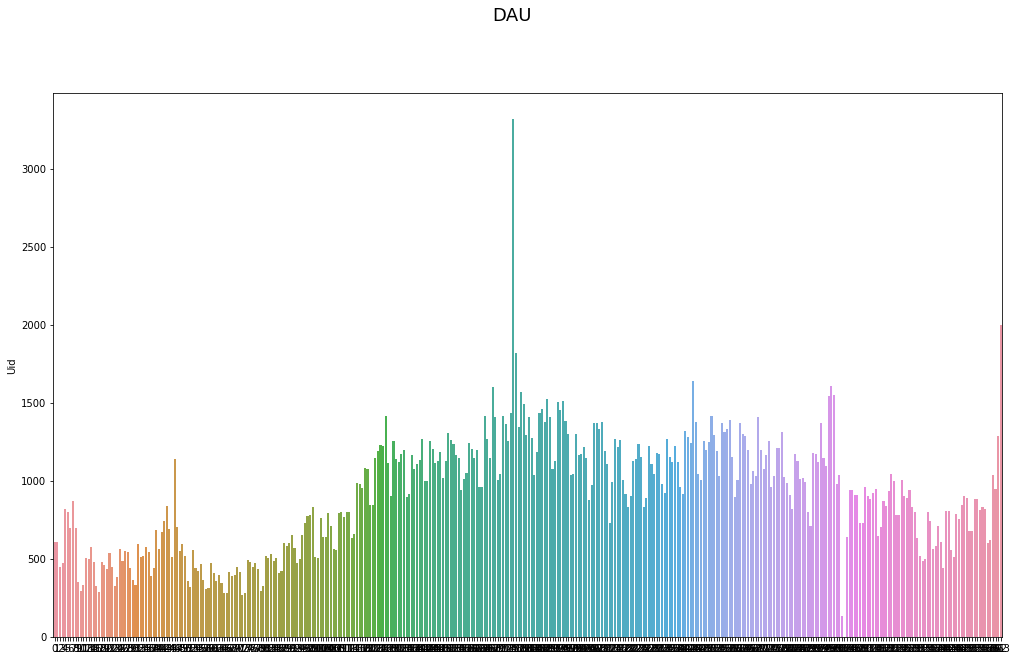

In [ ]:
plt.subplots(figsize = (17,10))
sns.barplot(x = dau.index, y='Uid', data=dau, ax = plt.subplot(1, 1, 1))
#plt.xticks(np.linspace(0,365,10))
plt.suptitle('DAU',fontsize=18, y=1)

In [ ]:
# plt.subplots(figsize = (17,10))
# sns.barplot(x = wau.index, y='Uid', data=wau , order=wau.index, hue="session_year", ax = plt.subplot(1, 1, 1))
# #data_plains.pivot_table(index='model',values = 'flights_amount').plot(ax = plt.subplot(1, 1, 1))
# plt.suptitle('WAU',fontsize=18, y=1)

Text(0.5, 1, 'WAU')

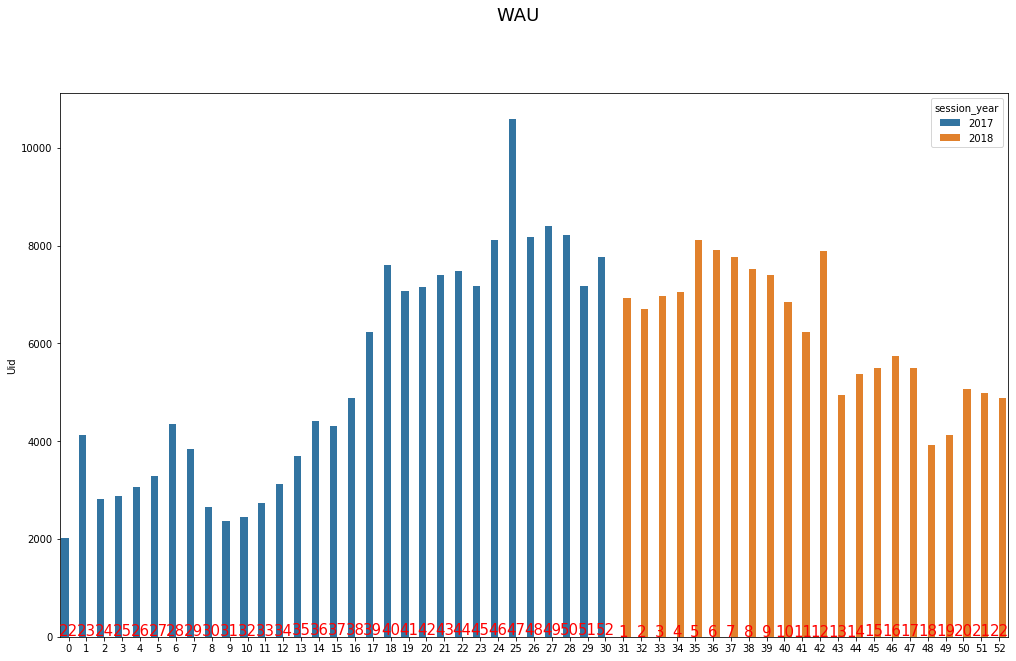

In [ ]:
plt.subplots(figsize = (17,10))
ax = sns.barplot(x=wau.index, y=wau['Uid'], order=wau.index,  hue=wau['session_year'])
for i, y in enumerate(wau['session_week']):
    ax.text(i, y, str(y), ha='center',color = 'red', fontsize = 15)
plt.suptitle('WAU',fontsize=18, y=1)

Text(0.5, 1, 'MAU')

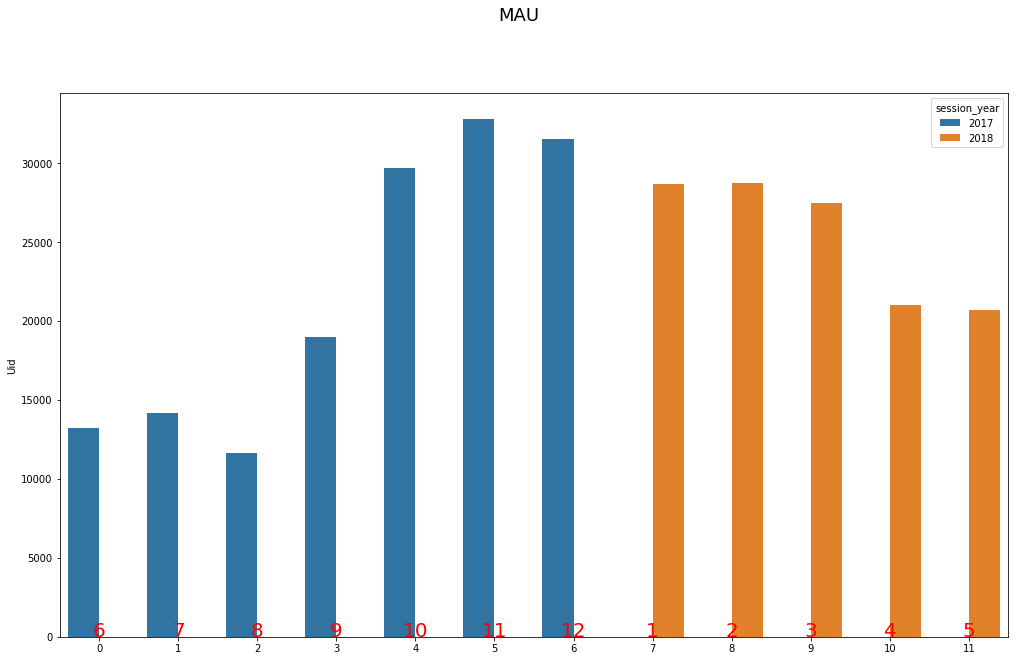

In [ ]:
plt.subplots(figsize = (17,10))
ax = sns.barplot(x=mau.index, y=mau['Uid'], order=mau.index,  hue=mau['session_year'])
for i, y in enumerate(mau['session_month']):
    ax.text(i, y, str(y), ha='center',color = 'red', fontsize = 20)
plt.suptitle('MAU',fontsize=18, y=1)

## 2) Сколько сессий в день? <a id="step4"></a>

 Посчитаем сколько сессий приходится на одного пользователя за месяц. 

In [ ]:
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,12,52,2017-12-27


In [ ]:
sessions_per_user = visits_log.groupby(['session_year', 'session_month']).agg({'Uid': ['count','nunique']})

In [ ]:
sessions_per_user

Uid        
                            count nunique
session_year session_month               
2017         6              16505   13259
             7              17828   14183
             8              14355   11631
             9              23907   18975
             10             37903   29692
             11             43969   32797
             12             41983   31557
2018         1              36939   28716
             2              37182   28749
             3              35679   27473
             4              26515   21008
             5              26635   20701

In [ ]:
sessions_per_user.columns = ['n_sessions', 'n_users']

In [ ]:
sessions_per_user['sessions_per_user'] = sessions_per_user['n_sessions'] / sessions_per_user['n_users']

In [ ]:
display(sessions_per_user)

n_sessions  n_users  sessions_per_user
session_year session_month                                        
2017         6                   16505    13259           1.244815
             7                   17828    14183           1.256998
             8                   14355    11631           1.234202
             9                   23907    18975           1.259921
             10                  37903    29692           1.276539
             11                  43969    32797           1.340641
             12                  41983    31557           1.330386
2018         1                   36939    28716           1.286356
             2                   37182    28749           1.293332
             3                   35679    27473           1.298693
             4                   26515    21008           1.262138
             5                   26635    20701           1.286653

In [ ]:
print("На одного пользователя за месяц в среднем приходится {0:.3f} сессий "\
      .format(sessions_per_user['sessions_per_user'].mean()))

На одного пользователя за месяц в среднем приходится 1.281 сессий 


## 3) Сколько длится одна сессия?<a id="step5"></a>

In [ ]:
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,7,26,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,12,52,2017-12-27


In [ ]:
visits_log['session_duration_sec'] = (visits_log['ses_date_end'] - visits_log['ses_date_start']).dt.seconds

In [ ]:
print(visits_log['session_duration_sec'].mean())

643.506488592098


In [ ]:
visits_log.head()

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date,session_duration_sec
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20,1080
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19,1680
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,7,26,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20,1440
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,12,52,2017-12-27,0


In [ ]:
%matplotlib inline

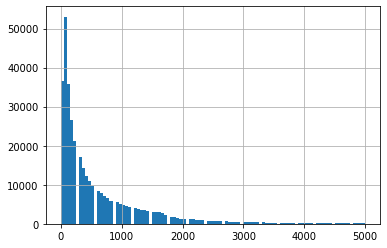

In [ ]:
visits_log['session_duration_sec'].hist(bins=100, range = (0,5000))

In [ ]:
visits_log['session_duration_sec'].describe()

count    359400.000000
mean        643.506489
std        1016.334786
min           0.000000
25%         120.000000
50%         300.000000
75%         840.000000
max       84480.000000
Name: session_duration_sec, dtype: float64

Т.к. распределение не близко к нормальному или нормальному, рассчитаем моду (значение в выборке, которое встречается чаще всего):

In [ ]:
asl = (visits_log['session_duration_sec'].mode())

In [ ]:
print("Чаще всего пользовательская сессия длится {} секунд ".format(asl))

Чаще всего пользовательская сессия длится 0    60
dtype: int64 секунд 


## 4) Как часто люди возвращаются?<a id="step6"></a>
Здесь необходимо рассчитать retention
rate для каждой когорты. Чтобы сделать это необходимо посчитать кол-во уникальных пользователей для каждой когорты и её возраста

Для каждого клиента получим дату его первого посещения

In [ ]:
first_session_dates = visits_log.groupby('Uid')['ses_date_start'].min()

In [ ]:
first_session_dates.head()

Uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: ses_date_start, dtype: datetime64[ns]

In [ ]:
first_session_dates.name = 'first_session_dates'

In [ ]:
first_session_dates.head()

Uid
11863502262781    2018-03-01 17:27:00
49537067089222    2018-02-06 15:55:00
297729379853735   2017-06-07 18:47:00
313578113262317   2017-09-18 22:49:00
325320750514679   2017-09-30 14:29:00
Name: first_session_dates, dtype: datetime64[ns]

Методом join() объединим датафрейм `visits_log` и Series `first_session_dates` по столбцу `Uid`

In [ ]:
sessions = visits_log.join(first_session_dates, on='Uid')

In [ ]:
sessions.head()

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date,session_duration_sec,first_session_dates
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,7,26,2017-07-01,0,2017-07-01 01:54:00
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,12,52,2017-12-27,0,2017-12-27 14:06:00


In [ ]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Device                359400 non-null  object        
 1   End Ts                359400 non-null  object        
 2   Source Id             359400 non-null  int64         
 3   Start Ts              359400 non-null  object        
 4   Uid                   359400 non-null  uint64        
 5   ses_date_start        359400 non-null  datetime64[ns]
 6   ses_date_end          359400 non-null  datetime64[ns]
 7   session_year          359400 non-null  int64         
 8   session_month         359400 non-null  int64         
 9   session_week          359400 non-null  int64         
 10  session_date          359400 non-null  object        
 11  session_duration_sec  359400 non-null  int64         
 12  first_session_dates   359400 non-null  datetime64[ns]
dtyp

приводим даты к типу `datetime64[M]`

In [ ]:
sessions['first_session_month'] = sessions['first_session_dates'].astype('datetime64[M]')

In [ ]:
sessions['session_month_start'] = sessions['session_date'].astype('datetime64[M]')

In [ ]:
sessions.head()

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date,session_duration_sec,first_session_dates,first_session_month,session_month_start
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01


In [ ]:
sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359400 entries, 0 to 359399
Data columns (total 15 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   Device                359400 non-null  object        
 1   End Ts                359400 non-null  object        
 2   Source Id             359400 non-null  int64         
 3   Start Ts              359400 non-null  object        
 4   Uid                   359400 non-null  uint64        
 5   ses_date_start        359400 non-null  datetime64[ns]
 6   ses_date_end          359400 non-null  datetime64[ns]
 7   session_year          359400 non-null  int64         
 8   session_month         359400 non-null  int64         
 9   session_week          359400 non-null  int64         
 10  session_date          359400 non-null  object        
 11  session_duration_sec  359400 non-null  int64         
 12  first_session_dates   359400 non-null  datetime64[ns]
 13 

Когортой станет столбец `first_session_month` — месяц, в котором была сделана первая сессия 

Отследим, как изменяется количество пользователей внутри одной когорты. Это позволит понять, сколько людей продолжают заходить в следующих месяцах после совершения первой сессии. Построим сводную таблицу.

In [ ]:
sessions.pivot_table(index='first_session_month',
    columns='session_month_start',
    values='Uid',
    aggfunc='nunique')

session_month_start,2017-06-01,2017-07-01,2017-08-01,2017-09-01,2017-10-01,2017-11-01,2017-12-01,2018-01-01,2018-02-01,2018-03-01,2018-04-01,2018-05-01
first_session_month,,,,,,,,,,,,
2017-06-01,13259.0,1043.0,713.0,814.0,909.0,947.0,809.0,766.0,694.0,674.0,539.0,596.0
2017-07-01,NaN,13140.0,737.0,674.0,738.0,765.0,633.0,596.0,601.0,510.0,376.0,361.0
2017-08-01,NaN,NaN,10181.0,783.0,640.0,639.0,510.0,448.0,370.0,402.0,284.0,265.0
2017-09-01,NaN,NaN,NaN,16704.0,1428.0,1156.0,847.0,658.0,632.0,599.0,404.0,381.0
2017-10-01,NaN,NaN,NaN,NaN,25977.0,2042.0,1357.0,1012.0,890.0,837.0,555.0,529.0
2017-11-01,NaN,NaN,NaN,NaN,NaN,27248.0,2133.0,1202.0,1054.0,919.0,638.0,594.0
2017-12-01,NaN,NaN,NaN,NaN,NaN,NaN,25268.0,1410.0,960.0,786.0,512.0,481.0
2018-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22624.0,1351.0,890.0,565.0,458.0
2018-02-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22197.0,1267.0,565.0,446.0


In [ ]:
sessions['cohort_lifetime_M'] = sessions['session_month_start'] - sessions['first_session_month']

In [ ]:
sessions['cohort_lifetime_M'] = sessions['cohort_lifetime_M'] / np.timedelta64(1,'M')

In [ ]:
sessions['cohort_lifetime_M'] = sessions['cohort_lifetime_M'].round().astype('int')

In [ ]:
sessions.head()

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date,session_duration_sec,first_session_dates,first_session_month,session_month_start,cohort_lifetime_M
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0


In [ ]:
cohorts = sessions.groupby(['first_session_month','cohort_lifetime_M']).agg({'Uid':'nunique'}).reset_index()

In [ ]:
cohorts.head()

,first_session_month,cohort_lifetime_M,Uid
0,2017-06-01,0,13259
1,2017-06-01,1,1043
2,2017-06-01,2,713
3,2017-06-01,3,814
4,2017-06-01,4,909


Найдём исходное количество пользователей в когорте. Возьмём их число на нулевой месяц

In [ ]:
initial_users_count = cohorts[cohorts['cohort_lifetime_M'] == 0][['first_session_month','Uid']]
initial_users_count = initial_users_count.rename(columns={'Uid':'cohort_users'})

In [ ]:
initial_users_count.head()

,first_session_month,cohort_users
0,2017-06-01,13259
12,2017-07-01,13140
23,2017-08-01,10181
33,2017-09-01,16704
42,2017-10-01,25977


Объединим данные по когортам с исходным количеством пользователей в когорте

In [ ]:
cohorts = cohorts.merge(initial_users_count,on='first_session_month')

In [ ]:
cohorts.head()

,first_session_month,cohort_lifetime_M,Uid,cohort_users
0,2017-06-01,0,13259,13259
1,2017-06-01,1,1043,13259
2,2017-06-01,2,713,13259
3,2017-06-01,3,814,13259
4,2017-06-01,4,909,13259


In [ ]:
cohorts['retention'] = cohorts['Uid']/cohorts['cohort_users']

In [ ]:
cohorts.head()

,first_session_month,cohort_lifetime_M,Uid,cohort_users,retention
0,2017-06-01,0,13259,13259,1.000000
1,2017-06-01,1,1043,13259,0.078664
2,2017-06-01,2,713,13259,0.053775
3,2017-06-01,3,814,13259,0.061392
4,2017-06-01,4,909,13259,0.068557


In [ ]:
retention_pivot = cohorts.pivot_table(index='first_session_month',
                                                          columns='cohort_lifetime_M',
                                                          values='retention',
                                                          aggfunc='sum')

In [ ]:
retention_pivot

cohort_lifetime_M,0,1,2,3,4,5,6,7,8,9,10,11
first_session_month,,,,,,,,,,,,
2017-06-01,1.0,0.078664,0.053775,0.061392,0.068557,0.071423,0.061015,0.057772,0.052342,0.050833,0.040652,0.044951
2017-07-01,1.0,0.056088,0.051294,0.056164,0.058219,0.048174,0.045358,0.045738,0.038813,0.028615,0.027473,NaN
2017-08-01,1.0,0.076908,0.062862,0.062764,0.050093,0.044004,0.036342,0.039485,0.027895,0.026029,NaN,NaN
2017-09-01,1.0,0.085489,0.069205,0.050706,0.039392,0.037835,0.035860,0.024186,0.022809,NaN,NaN,NaN
2017-10-01,1.0,0.078608,0.052239,0.038958,0.034261,0.032221,0.021365,0.020364,NaN,NaN,NaN,NaN
2017-11-01,1.0,0.078281,0.044113,0.038682,0.033727,0.023415,0.021800,NaN,NaN,NaN,NaN,NaN
2017-12-01,1.0,0.055802,0.037993,0.031107,0.020263,0.019036,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-01,1.0,0.059715,0.039339,0.024973,0.020244,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-02-01,1.0,0.057080,0.025454,0.020093,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


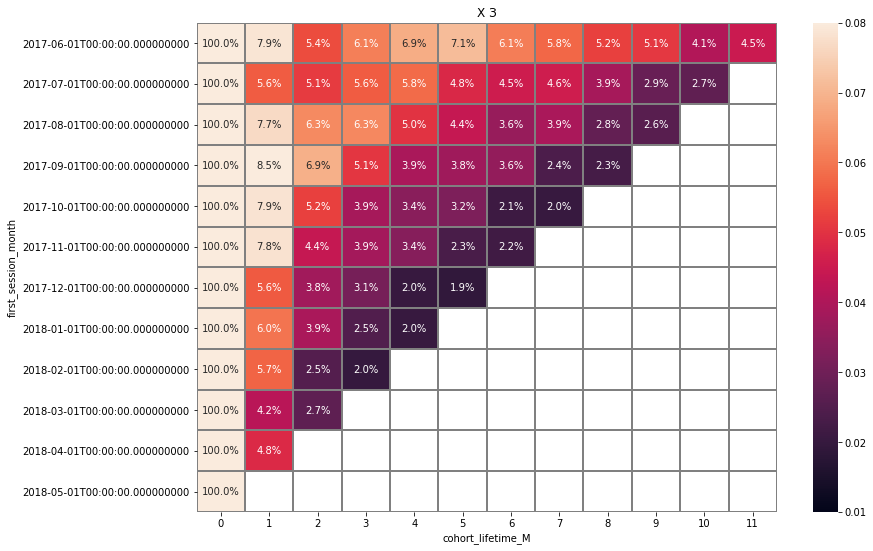

In [ ]:
plt.figure(figsize=(13, 9))
plt.title('Х З')
sns.heatmap(retention_pivot, vmin=0.01, vmax=0.08, annot=True, fmt='.1%', linewidths = 1, linecolor='gray')

Получили тепловую карту `Retention Rate`

# Шаг 3. Продажи <a id="step7"></a>

## 1) Когда люди начинают покупать? <a id="step8"></a>
Сколько дней обычно проходит от первого визита до первой покупки? Здесь важно ориентироваться только на тех пользователей, которые совершали покупки

In [ ]:
orders_log

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [ ]:
orders_log.drop_duplicates()

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [ ]:
sessions

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date,session_duration_sec,first_session_dates,first_session_month,session_month_start,cohort_lifetime_M
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
2,touch,2017-07-01 01:54:00,5,2017-07-01 01:54:00,7459035603376831527,2017-07-01 01:54:00,2017-07-01 01:54:00,2017,7,26,2017-07-01,0,2017-07-01 01:54:00,2017-07-01,2017-07-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
4,desktop,2017-12-27 14:06:00,3,2017-12-27 14:06:00,9969694820036681168,2017-12-27 14:06:00,2017-12-27 14:06:00,2017,12,52,2017-12-27,0,2017-12-27 14:06:00,2017-12-01,2017-12-01,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00,2017-07-29 19:07:19,2017,7,30,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00,2018-01-25 17:38:19,2018,1,4,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00,2018-03-03 10:12:19,2018,3,9,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00,2017-11-02 10:12:19,2017,11,44,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01,0


Оставляем сессии, которые длятся больше нуля секунд

In [ ]:
sessions = sessions[sessions['session_duration_sec'] > 0]

In [ ]:
sessions

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date,session_duration_sec,first_session_dates,first_session_month,session_month_start,cohort_lifetime_M
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,2018,1,5,2018-01-30,3360,2017-06-29 09:00:00,2017-06-01,2018-01-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00,2017-07-29 19:07:19,2017,7,30,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00,2018-01-25 17:38:19,2018,1,4,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00,2018-03-03 10:12:19,2018,3,9,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00,2017-11-02 10:12:19,2017,11,44,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01,0


In [ ]:
sessions

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date,session_duration_sec,first_session_dates,first_session_month,session_month_start,cohort_lifetime_M
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,2018,1,5,2018-01-30,3360,2017-06-29 09:00:00,2017-06-01,2018-01-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00,2017-07-29 19:07:19,2017,7,30,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00,2018-01-25 17:38:19,2018,1,4,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00,2018-03-03 10:12:19,2018,3,9,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00,2017-11-02 10:12:19,2017,11,44,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01,0


In [ ]:
sessions_fj = sessions.groupby(['Uid']).agg({'first_session_dates': 'min','Source Id': 'min'})
sessions_fj

,first_session_dates,Source Id
Uid,,
11863502262781,2018-03-01 17:27:00,3
49537067089222,2018-02-06 15:55:00,2
297729379853735,2017-06-07 18:47:00,3
313578113262317,2017-09-18 22:49:00,2
325320750514679,2017-09-30 14:29:00,5
...,...,...
18446316582013423015,2018-02-26 10:14:00,3
18446403737806311543,2017-11-30 03:36:00,5
18446556406699109058,2018-01-01 16:29:00,3


In [ ]:
purchases = orders_log.join(sessions_fj, on='Uid')

соединил `orders_log` и `sessions_fj` (visits) , есть `Source Id` и  `first_session_dates`  
теперь есть дата покупки и дата первой сессии, которая длится больше нуля секунд

In [ ]:
purchases

,Buy Ts,Revenue,Uid,first_session_dates,Source Id
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,3.0
...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,4.0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,10.0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,3.0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,3.0


In [ ]:
purchases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Buy Ts               50415 non-null  object        
 1   Revenue              50415 non-null  float64       
 2   Uid                  50415 non-null  uint64        
 3   first_session_dates  49941 non-null  datetime64[ns]
 4   Source Id            49941 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(1), uint64(1)
memory usage: 1.9+ MB


In [ ]:
purchases['Buy Ts'] = pd.to_datetime(purchases['Buy Ts'])

In [ ]:
purchases['diff'] = purchases['Buy Ts'] - purchases['first_session_dates']

In [ ]:
display(purchases)

,Buy Ts,Revenue,Uid,first_session_dates,Source Id,diff
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0,0 days 00:01:00
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2.0,0 days 00:11:00
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0,0 days 00:02:00
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2.0,0 days 00:15:00
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,3.0,0 days 00:27:00
...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,4.0,0 days 14:39:00
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,10.0,0 days 00:45:00
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,3.0,0 days 00:02:00
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,3.0,220 days 11:24:00


In [ ]:
purchases['diff_D'] = purchases['diff'].astype('timedelta64[D]')

In [ ]:
display(purchases)

,Buy Ts,Revenue,Uid,first_session_dates,Source Id,diff,diff_D
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01 00:09:00,1.0,0 days 00:01:00,0.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01 00:14:00,2.0,0 days 00:11:00,0.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01 00:25:00,2.0,0 days 00:02:00,0.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01 00:14:00,2.0,0 days 00:15:00,0.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01 07:31:00,3.0,0 days 00:27:00,0.0
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-31 09:11:00,4.0,0 days 14:39:00,0.0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-31 23:05:00,10.0,0 days 00:45:00,0.0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-31 23:52:00,3.0,0 days 00:02:00,0.0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2017-10-23 12:32:00,3.0,220 days 11:24:00,220.0


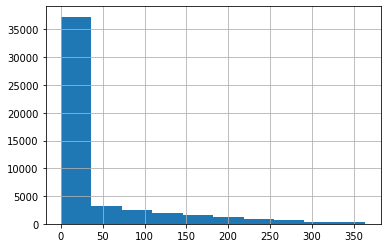

In [ ]:
%matplotlib inline
purchases['diff_D'].hist(bins=10)

In [ ]:
asl_Mean = (purchases['diff_D'].mean())
asl_Mode = (purchases['diff_D'].mode())

In [ ]:
print(asl_Mean)
print(asl_Mode)

36.862898219899485
0    0.0
dtype: float64


В среднем проходит 37 дней от первого визита до
первой покупки


## 2) Сколько раз покупают за период? <a id="step9"></a>
Снова считаем метрики по времени – месяца, недели,
дни. В данном случае – кол-во продаж. Не лишним будет построить график и временных
рядов

In [ ]:
orders_log

,Buy Ts,Revenue,Uid
0,2017-06-01 00:10:00,17.00,10329302124590727494
1,2017-06-01 00:25:00,0.55,11627257723692907447
2,2017-06-01 00:27:00,0.37,17903680561304213844
3,2017-06-01 00:29:00,0.55,16109239769442553005
4,2017-06-01 07:58:00,0.37,14200605875248379450
...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624
50411,2018-05-31 23:50:00,5.80,11369640365507475976
50412,2018-05-31 23:54:00,0.30,1786462140797698849
50413,2018-05-31 23:56:00,3.67,3993697860786194247


In [ ]:
orders_log['month'] = orders_log['Buy Ts'].astype('datetime64[M]')

In [ ]:
orders_log['week'] = orders_log['Buy Ts'].astype('datetime64[W]')

In [ ]:
orders_log['year'] = orders_log['Buy Ts'].astype('datetime64[Y]')

In [ ]:
orders_log["day"] = orders_log['Buy Ts'].astype('datetime64[D]')

In [ ]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Buy Ts   50415 non-null  object        
 1   Revenue  50415 non-null  float64       
 2   Uid      50415 non-null  uint64        
 3   month    50415 non-null  datetime64[ns]
 4   week     50415 non-null  datetime64[ns]
 5   year     50415 non-null  datetime64[ns]
 6   day      50415 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), object(1), uint64(1)
memory usage: 2.7+ MB


In [ ]:
orders_log

,Buy Ts,Revenue,Uid,month,week,year,day
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-01-01,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-01-01,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-01-01,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-01-01,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-01-01,2017-06-01
...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-01-01,2018-05-31
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-01-01,2018-05-31
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-01-01,2018-05-31
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-01-01,2018-05-31


In [ ]:
orders_log["month_rank"] = orders_log["month"].rank(method="dense")

In [ ]:
orders_log["week_rank"] = orders_log["week"].rank(method="dense")

In [ ]:
orders_log["year_rank"] = orders_log["year"].rank(method="dense")

In [ ]:
orders_log["day_rank"] = orders_log["day"].rank(method="dense")

In [ ]:
orders_log

,Buy Ts,Revenue,Uid,month,week,year,day,month_rank,week_rank,year_rank,day_rank
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0


In [ ]:
orders_log_M_count = orders_log.groupby(['year','month','month_rank']).agg({'Revenue': 'sum', 'Uid': 'count'}).reset_index()

In [ ]:
orders_log_M_count

,year,month,month_rank,Revenue,Uid
0,2017-01-01,2017-06-01,1.0,9557.49,2354
1,2017-01-01,2017-07-01,2.0,12539.47,2363
2,2017-01-01,2017-08-01,3.0,8758.78,1807
3,2017-01-01,2017-09-01,4.0,18345.51,3387
4,2017-01-01,2017-10-01,5.0,27987.70,5679
5,2017-01-01,2017-11-01,6.0,27069.93,5659
6,2017-01-01,2017-12-01,7.0,36388.60,6218
7,2018-01-01,2018-01-01,8.0,19417.13,4721
8,2018-01-01,2018-02-01,9.0,25560.54,5281
9,2018-01-01,2018-03-01,10.0,28834.59,5326


In [ ]:
orders_log_W_count = orders_log.groupby(['year','week','week_rank']).agg({'Revenue': 'sum', 'Uid': 'count'}).reset_index()

In [ ]:
orders_log_Day_count = orders_log.groupby(['year','day','day_rank']).agg({'Revenue': 'sum', 'Uid': 'count'}).reset_index()

In [ ]:
# orders_log_W_count

Строим графики временных рядов количества покупок

По месяцам

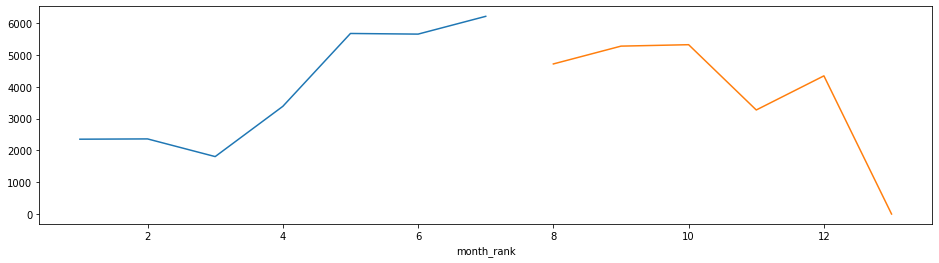

In [ ]:
fig, ax = plt.subplots(figsize=[16, 4])
orders_log_M_count.set_index("month_rank").groupby("year")["Uid"].plot(ax=ax)
plt.show()

По неделям

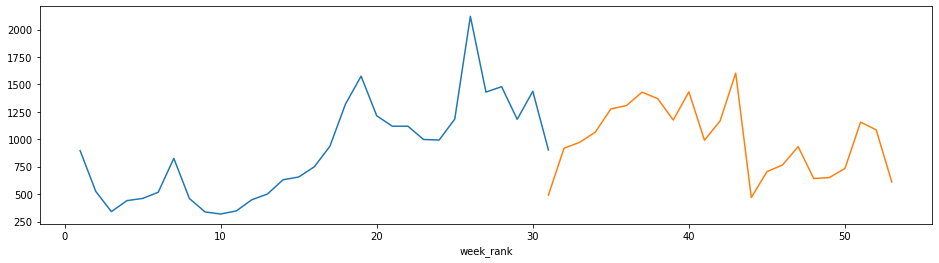

In [ ]:
fig, ax = plt.subplots(figsize=[16, 4])
orders_log_W_count.set_index("week_rank").groupby("year")["Uid"].plot(ax=ax)
plt.show()

Дням

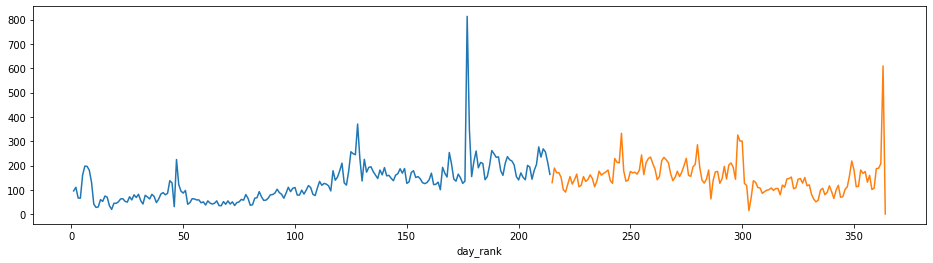

In [ ]:
fig, ax = plt.subplots(figsize=[16, 4])
orders_log_Day_count.set_index("day_rank").groupby("year")["Uid"].plot(ax=ax)
plt.show()

<div style="border:solid blue 2px; padding: 20px">
Рассчитаем на одного пользователя. Сколько раз пользователь покупает за месяц, неделю , день.
</div>

In [ ]:
orders_log_M= orders_log.groupby(['year','month']).agg({'Uid': ['count','nunique']}).reset_index()

In [ ]:
orders_log_M

year      month   Uid        
                         count nunique
0  2017-01-01 2017-06-01  2354    2023
1  2017-01-01 2017-07-01  2363    1984
2  2017-01-01 2017-08-01  1807    1472
3  2017-01-01 2017-09-01  3387    2750
4  2017-01-01 2017-10-01  5679    4675
5  2017-01-01 2017-11-01  5659    4547
6  2017-01-01 2017-12-01  6218    4942
7  2018-01-01 2018-01-01  4721    3898
8  2018-01-01 2018-02-01  5281    4258
9  2018-01-01 2018-03-01  5326    4181
10 2018-01-01 2018-04-01  3273    2744
11 2018-01-01 2018-05-01  4346    3544
12 2018-01-01 2018-06-01     1       1

In [ ]:
orders_log_M.columns = ['year','month','count', 'nunique']
orders_log_M['count_per_user'] = round(orders_log_M['count'] / orders_log_M['nunique'],2)
orders_log_M

,year,month,count,nunique,count_per_user
0,2017-01-01,2017-06-01,2354,2023,1.16
1,2017-01-01,2017-07-01,2363,1984,1.19
2,2017-01-01,2017-08-01,1807,1472,1.23
3,2017-01-01,2017-09-01,3387,2750,1.23
4,2017-01-01,2017-10-01,5679,4675,1.21
5,2017-01-01,2017-11-01,5659,4547,1.24
6,2017-01-01,2017-12-01,6218,4942,1.26
7,2018-01-01,2018-01-01,4721,3898,1.21
8,2018-01-01,2018-02-01,5281,4258,1.24
9,2018-01-01,2018-03-01,5326,4181,1.27


Text(0.5, 1, 'Покупает в месяц')

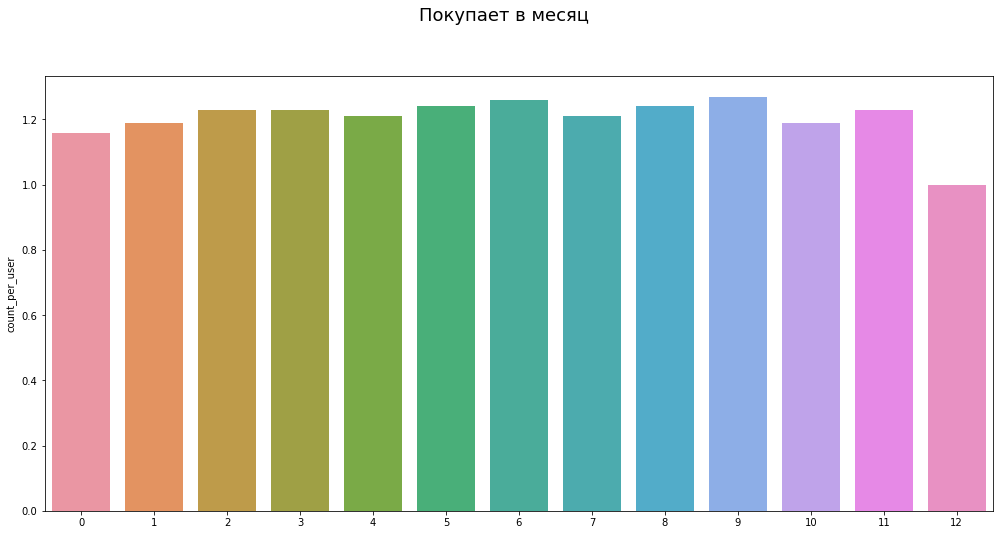

In [ ]:
plt.subplots(figsize = (17,8))
sns.barplot(x = orders_log_M.index, y='count_per_user', data=orders_log_M , ax = plt.subplot(1, 1, 1))
plt.suptitle('Покупает в месяц',fontsize=18, y=1)

In [ ]:
orders_log_W = orders_log.groupby(['year','week']).agg({'Uid': ['count','nunique']}).reset_index()
orders_log_W.head()

year       week   Uid        
                        count nunique
0 2017-01-01 2017-06-01   896     774
1 2017-01-01 2017-06-08   525     478
2 2017-01-01 2017-06-15   341     310
3 2017-01-01 2017-06-22   441     396
4 2017-01-01 2017-06-29   461     416

In [ ]:
orders_log_W.columns = ['year','week','count', 'nunique']
orders_log_W['count_per_user'] = round(orders_log_W['count'] / orders_log_W['nunique'],2)

Text(0.5, 1, 'Покупает в неделю')

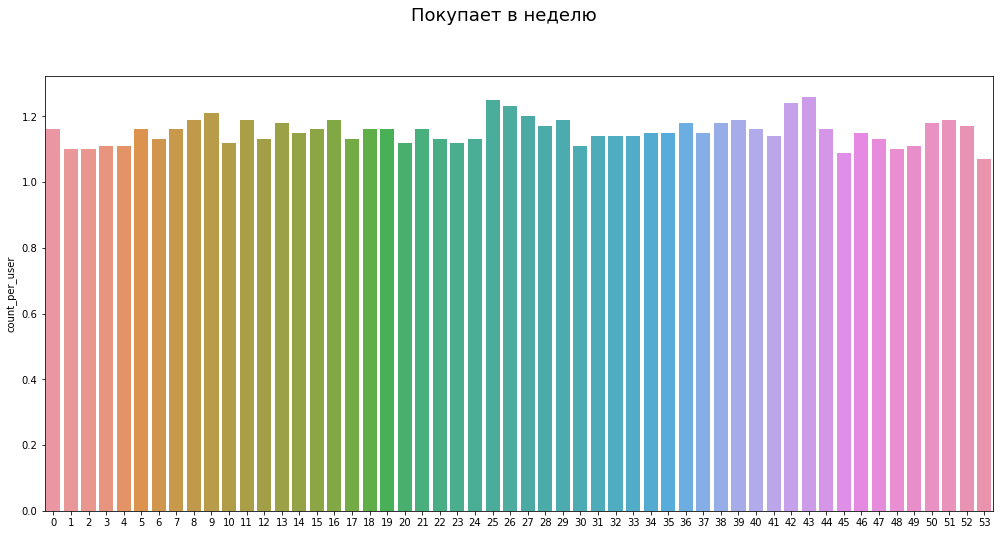

In [ ]:

plt.subplots(figsize = (17,8))
sns.barplot(x = orders_log_W.index, y='count_per_user', data=orders_log_W , order=orders_log_W.index,  ax = plt.subplot(1, 1, 1))
plt.suptitle('Покупает в неделю',fontsize=18, y=1)


In [ ]:
orders_log_D = orders_log.groupby(['year','day']).agg({'Uid': ['count','nunique']}).reset_index()
orders_log_D.head()

year        day   Uid        
                        count nunique
0 2017-01-01 2017-06-01    96      86
1 2017-01-01 2017-06-02   111     101
2 2017-01-01 2017-06-03    67      61
3 2017-01-01 2017-06-04    66      59
4 2017-01-01 2017-06-05   161     146

In [ ]:
orders_log_D.columns = ['year','day','count', 'nunique']
orders_log_D['count_per_user'] = round(orders_log_D['count'] / orders_log_D['nunique'],2)
orders_log_D.head()

,year,day,count,nunique,count_per_user
0,2017-01-01,2017-06-01,96,86,1.12
1,2017-01-01,2017-06-02,111,101,1.10
2,2017-01-01,2017-06-03,67,61,1.10
3,2017-01-01,2017-06-04,66,59,1.12
4,2017-01-01,2017-06-05,161,146,1.10


Text(0.5, 1, 'Покупает в день')

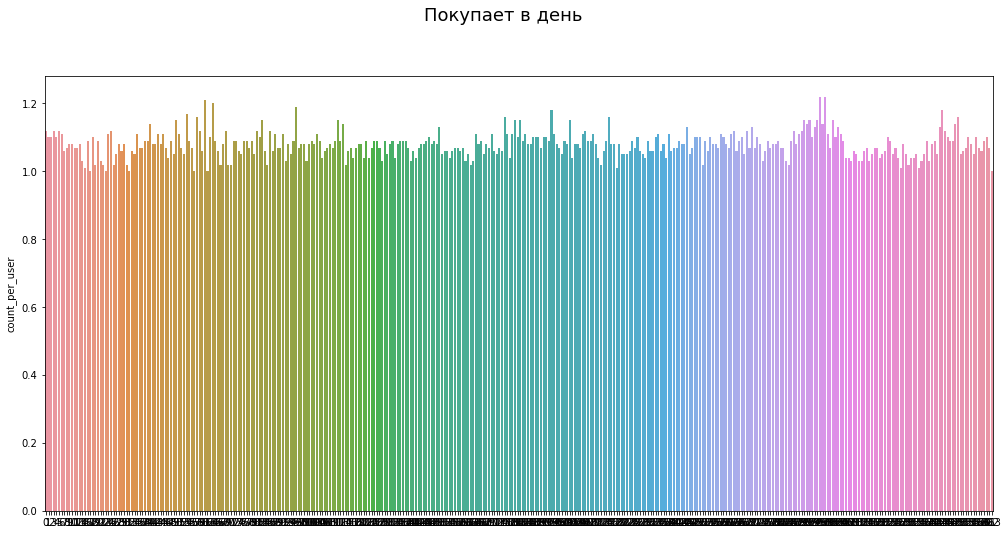

In [ ]:
plt.subplots(figsize = (17,8))
sns.barplot(x = orders_log_D.index, y='count_per_user', data=orders_log_D , order=orders_log_D.index,  ax = plt.subplot(1, 1, 1))
plt.suptitle('Покупает в день',fontsize=18, y=1)

## 3) Какой средний чек? <a id="step10"></a>
и как он меняется? Здесь посчитаем средний чек по
месяцам, неделям, дням и построить соответствующие графики временных рядов. Средний
чек = Суммарная прибыль/кол-во продаж)

In [ ]:
orders_log

,Buy Ts,Revenue,Uid,month,week,year,day,month_rank,week_rank,year_rank,day_rank
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0


In [ ]:
orders_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50415 entries, 0 to 50414
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Buy Ts      50415 non-null  object        
 1   Revenue     50415 non-null  float64       
 2   Uid         50415 non-null  uint64        
 3   month       50415 non-null  datetime64[ns]
 4   week        50415 non-null  datetime64[ns]
 5   year        50415 non-null  datetime64[ns]
 6   day         50415 non-null  datetime64[ns]
 7   month_rank  50415 non-null  float64       
 8   week_rank   50415 non-null  float64       
 9   year_rank   50415 non-null  float64       
 10  day_rank    50415 non-null  float64       
dtypes: datetime64[ns](4), float64(5), object(1), uint64(1)
memory usage: 4.2+ MB


In [ ]:
orders_log_M_count

,year,month,month_rank,Revenue,Uid
0,2017-01-01,2017-06-01,1.0,9557.49,2354
1,2017-01-01,2017-07-01,2.0,12539.47,2363
2,2017-01-01,2017-08-01,3.0,8758.78,1807
3,2017-01-01,2017-09-01,4.0,18345.51,3387
4,2017-01-01,2017-10-01,5.0,27987.70,5679
5,2017-01-01,2017-11-01,6.0,27069.93,5659
6,2017-01-01,2017-12-01,7.0,36388.60,6218
7,2018-01-01,2018-01-01,8.0,19417.13,4721
8,2018-01-01,2018-02-01,9.0,25560.54,5281
9,2018-01-01,2018-03-01,10.0,28834.59,5326


In [ ]:
orders_log_M_count['revenue_per_user'] = orders_log_M_count['Revenue'] / orders_log_M_count['Uid']
orders_log_W_count['revenue_per_user'] = orders_log_W_count['Revenue'] / orders_log_W_count['Uid']
orders_log_Day_count['revenue_per_user'] = orders_log_Day_count['Revenue'] / orders_log_Day_count['Uid'] 

In [ ]:
orders_log_M_count

,year,month,month_rank,Revenue,Uid,revenue_per_user
0,2017-01-01,2017-06-01,1.0,9557.49,2354,4.060106
1,2017-01-01,2017-07-01,2.0,12539.47,2363,5.306589
2,2017-01-01,2017-08-01,3.0,8758.78,1807,4.847139
3,2017-01-01,2017-09-01,4.0,18345.51,3387,5.416448
4,2017-01-01,2017-10-01,5.0,27987.70,5679,4.928280
5,2017-01-01,2017-11-01,6.0,27069.93,5659,4.783518
6,2017-01-01,2017-12-01,7.0,36388.60,6218,5.852139
7,2018-01-01,2018-01-01,8.0,19417.13,4721,4.112927
8,2018-01-01,2018-02-01,9.0,25560.54,5281,4.840095
9,2018-01-01,2018-03-01,10.0,28834.59,5326,5.413930


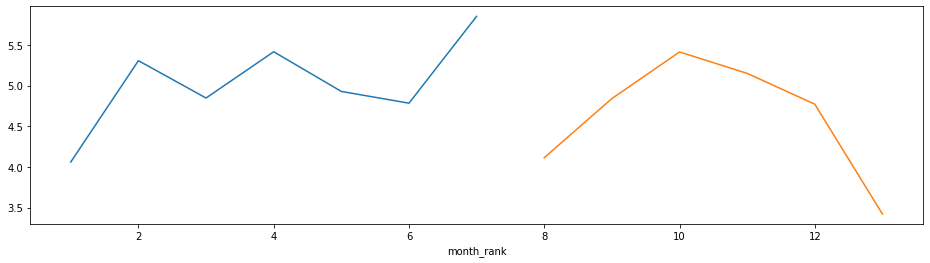

In [ ]:
fig, ax = plt.subplots(figsize=[16, 4])
orders_log_M_count.set_index("month_rank").groupby("year")["revenue_per_user"].plot(ax=ax)
plt.show()

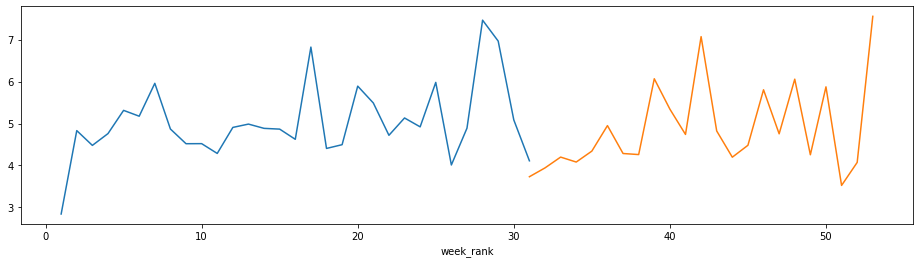

In [ ]:
fig, ax = plt.subplots(figsize=[16, 4])
orders_log_W_count.set_index("week_rank").groupby("year")["revenue_per_user"].plot(ax=ax)
plt.show()

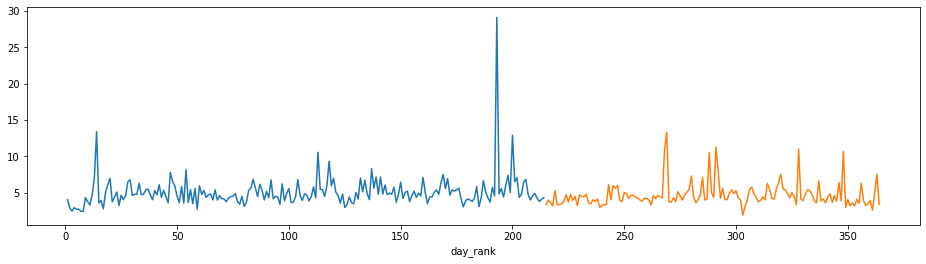

In [ ]:
fig, ax = plt.subplots(figsize=[16, 4])
orders_log_Day_count.set_index("day_rank").groupby("year")["revenue_per_user"].plot(ax=ax)
plt.show()

## 4) Сколько денег приносят? (LTV) <a id="step11"></a>
для этого нужно:  
• Посчитать кол-во покупателей для когорты  
• Посчитать кол-во заказов и объемы продаж за соответствующие месяца (когорт)  
• Посчитать выручку и кол-во заказов на каждого покупателя  
• Посчитать суммарную выручку и кол-во заказов для каждой когорты и её возраста  
• Посчитать накопленную выручку для каждой когорты и её возраста  

In [ ]:
orders_log

,Buy Ts,Revenue,Uid,month,week,year,day,month_rank,week_rank,year_rank,day_rank
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0


In [ ]:
orders_log['Buy Ts'].describe()

count                   50415
unique                  45991
top       2018-05-31 10:13:00
freq                        9
Name: Buy Ts, dtype: object

Получим месяц первой покупки каждого покупателя

In [ ]:
first_orders = orders_log.groupby('Uid').agg({'month': 'min'}).reset_index()

In [ ]:
first_orders.columns = ['Uid', 'first_order_month']
print(first_orders.head())

                Uid first_order_month
0   313578113262317        2018-01-01
1  1575281904278712        2017-06-01
2  2429014661409475        2017-10-01
3  2464366381792757        2018-01-01
4  2551852515556206        2017-11-01


Посчитаем количество новых покупателей `n_buyers` за каждый месяц

In [ ]:
cohort_sizes = first_orders.groupby('first_order_month').agg({'Uid': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
print(cohort_sizes.head())

  first_order_month  n_buyers
0        2017-06-01      2023
1        2017-07-01      1923
2        2017-08-01      1370
3        2017-09-01      2581
4        2017-10-01      4340


Построим когорты. Добавим месяц первой покупки каждого покупателя в таблицу с заказами

In [ ]:
orders_new = pd.merge(orders_log,first_orders, on='Uid')
orders_new.head()

,Buy Ts,Revenue,Uid,month,week,year,day,month_rank,week_rank,year_rank,day_rank,first_order_month
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0,2017-06-01
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0,2017-06-01
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0,2017-06-01
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0,2017-06-01
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0,2017-06-01


Сгруппируем таблицу заказов по месяцу первой покупки и месяцу каждого заказа и сложим выручку.

In [ ]:
cohorts = orders_new.groupby(['first_order_month','month']).agg({'Revenue': 'sum'}).reset_index()
print(cohorts.head())

  first_order_month      month  Revenue
0        2017-06-01 2017-06-01  9557.49
1        2017-06-01 2017-07-01   981.82
2        2017-06-01 2017-08-01   885.34
3        2017-06-01 2017-09-01  1931.30
4        2017-06-01 2017-10-01  2068.58


Добавим в таблицу `cohorts` данные о том, сколько людей первый раз совершили покупку в каждый месяц:

In [ ]:
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
print(report.head())

  first_order_month  n_buyers      month  Revenue
0        2017-06-01      2023 2017-06-01  9557.49
1        2017-06-01      2023 2017-07-01   981.82
2        2017-06-01      2023 2017-08-01   885.34
3        2017-06-01      2023 2017-09-01  1931.30
4        2017-06-01      2023 2017-10-01  2068.58


In [ ]:
report['age'] = (report['month'] - report['first_order_month']) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

In [ ]:
report['LTV'] = report['Revenue'] / report['n_buyers']

In [ ]:
report

,first_order_month,n_buyers,month,Revenue,age,LTV
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531
...,...,...,...,...,...,...
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599
77,2018-05-01,2988,2018-05-01,13925.76,0,4.660562


In [ ]:
output = report.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='LTV', 
        aggfunc='mean').round(2)
    
output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,4.72,0.49,0.44,0.95,1.02,0.74,0.95,0.58,0.55,0.61,0.57,0.26
2017-07-01,6.01,0.34,0.62,0.36,0.18,0.16,0.12,0.14,0.16,0.15,0.16,
2017-08-01,5.28,0.47,0.46,0.39,0.49,0.28,0.21,0.41,0.29,0.19,,
2017-09-01,5.64,1.12,0.52,3.98,0.4,0.65,0.7,0.24,0.18,,,
2017-10-01,5.00,0.54,0.19,0.16,0.15,0.12,0.08,0.12,,,,
2017-11-01,5.15,0.4,0.2,0.32,0.15,0.05,0.11,,,,,
2017-12-01,4.74,0.26,0.93,1.07,0.31,0.34,,,,,,
2018-01-01,4.14,0.29,0.3,0.14,0.06,,,,,,,
2018-02-01,4.16,0.28,0.08,0.07,,,,,,,,


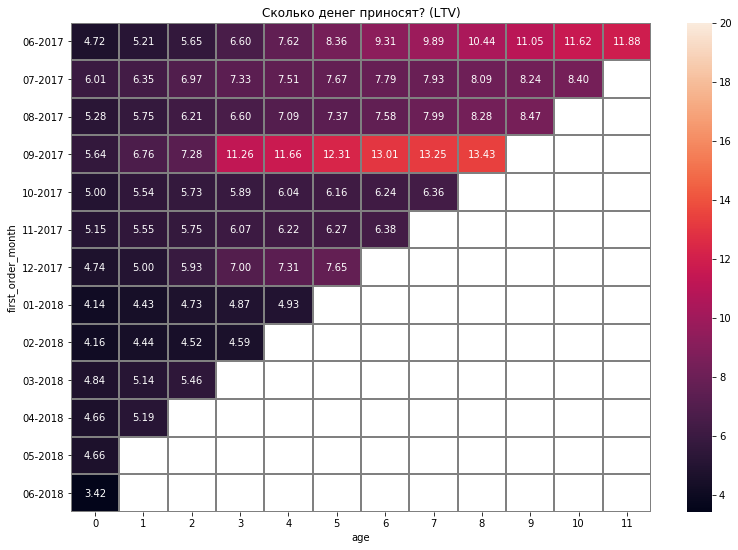

In [ ]:
result = output.cumsum(axis=1).round(2)

plt.figure(figsize=(13, 9))
plt.title('Сколько денег приносят? (LTV)')
ax = sns.heatmap(result, annot=True, fmt='.2f', linewidths=1, linecolor='grey', vmax=20)
ax.set_yticklabels(result.index.strftime('%m-%Y'));

In [ ]:
ltv_201706 = output.loc['2017-06-01'].sum()
print(ltv_201706)

11.88


In [ ]:
output.cumsum(axis=1).mean(axis=0) 

age
0      4.801538
1      5.396364
2      5.823000
3      6.690000
4      7.297500
5      7.970000
6      8.385000
7      9.084000
8     10.060000
9      9.253333
10    10.010000
11    11.880000
dtype: float64

# Шаг 4. Маркетинг <a id="step12"></a>

## 1) Сколько денег потратили? <a id="step13"></a>
Всего / на каждый источник / по времени 

In [ ]:
costs

,source_id,dt,costs
0,1,2017-06-01,75.20
1,1,2017-06-02,62.25
2,1,2017-06-03,36.53
3,1,2017-06-04,55.00
4,1,2017-06-05,57.08
...,...,...,...
2537,10,2018-05-27,9.92
2538,10,2018-05-28,21.26
2539,10,2018-05-29,11.32
2540,10,2018-05-30,33.15


In [ ]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2542 entries, 0 to 2541
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   source_id  2542 non-null   int64  
 1   dt         2542 non-null   object 
 2   costs      2542 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 59.7+ KB


In [ ]:
costs['dt'].describe()

count           2542
unique           364
top       2018-03-30
freq               7
Name: dt, dtype: object

In [ ]:
costs['month'] = costs['dt'].astype('datetime64[M]')

Потратили всего

In [ ]:
monthly_costs_all = costs['costs'].sum()
monthly_costs_all

329131.62

In [ ]:
monthly_costs = costs.groupby('month').agg({'costs': 'sum', 'source_id': 'nunique'}).reset_index()
monthly_costs

,month,costs,source_id
0,2017-06-01,18015.00,7
1,2017-07-01,18240.59,7
2,2017-08-01,14790.54,7
3,2017-09-01,24368.91,7
4,2017-10-01,36322.88,7
5,2017-11-01,37907.88,7
6,2017-12-01,38315.35,7
7,2018-01-01,33518.52,7
8,2018-02-01,32723.03,7
9,2018-03-01,30415.27,7


Потратили на все источники по месяцам

In [ ]:
source_costs = costs.groupby('source_id').agg({'costs': 'sum', 'month': 'nunique'}).reset_index()
source_costs

,source_id,costs,month
0,1,20833.27,12
1,2,42806.04,12
2,3,141321.63,12
3,4,61073.60,12
4,5,51757.10,12
5,9,5517.49,12
6,10,5822.49,12


Потратили всего по источникам

## 2) Сколько стоило привлечение одного покупателя из каждого источника?<a id="step14"></a>

In [ ]:
sessions

,Device,End Ts,Source Id,Start Ts,Uid,ses_date_start,ses_date_end,session_year,session_month,session_week,session_date,session_duration_sec,first_session_dates,first_session_month,session_month_start,cohort_lifetime_M
0,touch,2017-12-20 17:38:00,4,2017-12-20 17:20:00,16879256277535980062,2017-12-20 17:20:00,2017-12-20 17:38:00,2017,12,51,2017-12-20,1080,2017-12-20 17:20:00,2017-12-01,2017-12-01,0
1,desktop,2018-02-19 17:21:00,2,2018-02-19 16:53:00,104060357244891740,2018-02-19 16:53:00,2018-02-19 17:21:00,2018,2,8,2018-02-19,1680,2018-02-19 16:53:00,2018-02-01,2018-02-01,0
3,desktop,2018-05-20 11:23:00,9,2018-05-20 10:59:00,16174680259334210214,2018-05-20 10:59:00,2018-05-20 11:23:00,2018,5,20,2018-05-20,1440,2018-03-09 20:05:00,2018-03-01,2018-05-01,2
5,desktop,2017-09-03 21:36:00,5,2017-09-03 21:35:00,16007536194108375387,2017-09-03 21:35:00,2017-09-03 21:36:00,2017,9,35,2017-09-03,60,2017-09-03 21:35:00,2017-09-01,2017-09-01,0
6,desktop,2018-01-30 12:09:00,1,2018-01-30 11:13:00,6661610529277171451,2018-01-30 11:13:00,2018-01-30 12:09:00,2018,1,5,2018-01-30,3360,2017-06-29 09:00:00,2017-06-01,2018-01-01,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359395,desktop,2017-07-29 19:07:19,2,2017-07-29 19:07:00,18363291481961487539,2017-07-29 19:07:00,2017-07-29 19:07:19,2017,7,30,2017-07-29,19,2017-07-29 19:07:00,2017-07-01,2017-07-01,0
359396,touch,2018-01-25 17:38:19,1,2018-01-25 17:38:00,18370831553019119586,2018-01-25 17:38:00,2018-01-25 17:38:19,2018,1,4,2018-01-25,19,2018-01-25 17:38:00,2018-01-01,2018-01-01,0
359397,desktop,2018-03-03 10:12:19,4,2018-03-03 10:12:00,18387297585500748294,2018-03-03 10:12:00,2018-03-03 10:12:19,2018,3,9,2018-03-03,19,2018-03-03 10:12:00,2018-03-01,2018-03-01,0
359398,desktop,2017-11-02 10:12:19,5,2017-11-02 10:12:00,18388616944624776485,2017-11-02 10:12:00,2017-11-02 10:12:19,2017,11,44,2017-11-02,19,2017-11-02 10:12:00,2017-11-01,2017-11-01,0


Таблица затрат по месяцам

In [ ]:
monthly_costs = costs.groupby('month').agg({'costs': 'sum', 'source_id': 'nunique'}).reset_index()
monthly_costs

,month,costs,source_id
0,2017-06-01,18015.00,7
1,2017-07-01,18240.59,7
2,2017-08-01,14790.54,7
3,2017-09-01,24368.91,7
4,2017-10-01,36322.88,7
5,2017-11-01,37907.88,7
6,2017-12-01,38315.35,7
7,2018-01-01,33518.52,7
8,2018-02-01,32723.03,7
9,2018-03-01,30415.27,7


Создаем таблицу с датами первого визита на сайт и источником, группируем по `Uid`

In [ ]:
sessions_fs = sessions.groupby(['Uid']).agg({'first_session_dates': 'min', 'Source Id': 'min'})
#sessions_fs.set_index('Uid').set_index('Uid')

In [ ]:
sessions_fs

,first_session_dates,Source Id
Uid,,
11863502262781,2018-03-01 17:27:00,3
49537067089222,2018-02-06 15:55:00,2
297729379853735,2017-06-07 18:47:00,3
313578113262317,2017-09-18 22:49:00,2
325320750514679,2017-09-30 14:29:00,5
...,...,...
18446316582013423015,2018-02-26 10:14:00,3
18446403737806311543,2017-11-30 03:36:00,5
18446556406699109058,2018-01-01 16:29:00,3


In [ ]:
orders_log

,Buy Ts,Revenue,Uid,month,week,year,day,month_rank,week_rank,year_rank,day_rank
0,2017-06-01 00:10:00,17.00,10329302124590727494,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
1,2017-06-01 00:25:00,0.55,11627257723692907447,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
2,2017-06-01 00:27:00,0.37,17903680561304213844,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
3,2017-06-01 00:29:00,0.55,16109239769442553005,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
4,2017-06-01 07:58:00,0.37,14200605875248379450,2017-06-01,2017-06-01,2017-01-01,2017-06-01,1.0,1.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
50410,2018-05-31 23:50:00,4.64,12296626599487328624,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50411,2018-05-31 23:50:00,5.80,11369640365507475976,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50412,2018-05-31 23:54:00,0.30,1786462140797698849,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0
50413,2018-05-31 23:56:00,3.67,3993697860786194247,2018-05-01,2018-05-31,2018-01-01,2018-05-31,12.0,53.0,2.0,363.0


Создаем таблицу с датами первого заказа , группируем по `Uid`

In [ ]:
orders_log_fo = orders_log.groupby(['Uid']).agg({'Buy Ts': 'min'})
orders_log_fo

,Buy Ts
Uid,
313578113262317,2018-01-03 21:51:00
1575281904278712,2017-06-03 10:13:00
2429014661409475,2017-10-11 18:33:00
2464366381792757,2018-01-28 15:54:00
2551852515556206,2017-11-24 10:14:00
...,...
18445147675727495770,2017-11-24 09:03:00
18445407535914413204,2017-09-22 23:55:00
18445601152732270159,2018-03-26 22:54:00


Джоиним по `Uid`, дропаем если нет совпадений

In [ ]:
purchases = orders_log_fo.join(sessions_fs, on='Uid').dropna().reset_index()

In [ ]:
purchases 

,Uid,Buy Ts,first_session_dates,Source Id
0,313578113262317,2018-01-03 21:51:00,2017-09-18 22:49:00,2.0
1,1575281904278712,2017-06-03 10:13:00,2017-06-03 10:13:00,10.0
2,2429014661409475,2017-10-11 18:33:00,2017-10-11 17:14:00,3.0
3,2464366381792757,2018-01-28 15:54:00,2018-01-27 20:10:00,5.0
4,2551852515556206,2017-11-24 10:14:00,2017-11-24 10:14:00,5.0
...,...,...,...,...
36076,18442290965339407211,2018-02-05 19:39:00,2018-02-05 19:35:00,3.0
36077,18445407535914413204,2017-09-22 23:55:00,2017-09-22 23:48:00,2.0
36078,18445601152732270159,2018-03-26 22:54:00,2017-08-07 11:51:00,2.0
36079,18446156210226471712,2018-02-18 19:34:00,2017-11-07 10:01:00,1.0


Группируем по источникам

In [ ]:
purchases = purchases.groupby(['Source Id']).agg({'Uid': 'count'})

Получаем таблицу "первых" визитов по источникам

In [ ]:
purchases

,Uid
Source Id,
1.0,6929
2.0,5198
3.0,9419
4.0,8132
5.0,4959
7.0,1
9.0,540
10.0,903


In [ ]:
costs = costs.groupby(['source_id']).agg({'costs': 'sum'})

In [ ]:
costs

,costs
source_id,
1,20833.27
2,42806.04
3,141321.63
4,61073.60
5,51757.10
9,5517.49
10,5822.49


Джоиним затраты

In [ ]:
purchases1 = purchases.join(costs).dropna()

In [ ]:
purchases1['CAC'] = purchases1['costs']/purchases1['Uid']

In [ ]:
purchases1

,Uid,costs,CAC
Source Id,,,
1.0,6929,20833.27,3.006678
2.0,5198,42806.04,8.235098
3.0,9419,141321.63,15.003889
4.0,8132,61073.60,7.510280
5.0,4959,51757.10,10.437003
9.0,540,5517.49,10.217574
10.0,903,5822.49,6.447940


Получаем стоимость привлечения клиента по источникам


## 2) На сколько окупились расходы? (ROI)<a id="step15"></a>

Добавим данные о расходах и посчитаем CAC

In [ ]:
report_new = pd.merge(report, monthly_costs, left_on='first_order_month', right_on='month')
report_new['cac'] = report_new['costs'] / report_new['n_buyers']
report_new

,first_order_month,n_buyers,month_x,Revenue,age,LTV,month_y,costs,source_id,cac
0,2017-06-01,2023,2017-06-01,9557.49,0,4.724414,2017-06-01,18015.00,7,8.905091
1,2017-06-01,2023,2017-07-01,981.82,1,0.485329,2017-06-01,18015.00,7,8.905091
2,2017-06-01,2023,2017-08-01,885.34,2,0.437637,2017-06-01,18015.00,7,8.905091
3,2017-06-01,2023,2017-09-01,1931.30,3,0.954671,2017-06-01,18015.00,7,8.905091
4,2017-06-01,2023,2017-10-01,2068.58,4,1.022531,2017-06-01,18015.00,7,8.905091
...,...,...,...,...,...,...,...,...,...,...
73,2018-03-01,3533,2018-04-01,1063.05,1,0.300892,2018-03-01,30415.27,7,8.608907
74,2018-03-01,3533,2018-05-01,1114.87,2,0.315559,2018-03-01,30415.27,7,8.608907
75,2018-04-01,2276,2018-04-01,10600.69,0,4.657597,2018-04-01,22289.38,7,9.793225
76,2018-04-01,2276,2018-05-01,1209.92,1,0.531599,2018-04-01,22289.38,7,9.793225


Рассчитаем ROMI: поделим LTV на CAC.

In [ ]:
report_new['romi'] = report_new['LTV'] / report_new['cac']

output = report_new.pivot_table(
        index='first_order_month', 
        columns='age', 
        values='romi', 
        aggfunc='mean')

output.cumsum(axis=1).round(2).fillna('')
#output.fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11
first_order_month,,,,,,,,,,,,
2017-06-01,0.53,0.59,0.63,0.74,0.86,0.94,1.05,1.11,1.17,1.24,1.31,1.33
2017-07-01,0.63,0.67,0.73,0.77,0.79,0.81,0.82,0.84,0.85,0.87,0.88,
2017-08-01,0.49,0.53,0.57,0.61,0.66,0.68,0.7,0.74,0.77,0.78,,
2017-09-01,0.60,0.72,0.77,1.19,1.23,1.3,1.38,1.4,1.42,,,
2017-10-01,0.60,0.66,0.68,0.7,0.72,0.74,0.75,0.76,,,,
2017-11-01,0.55,0.6,0.62,0.65,0.67,0.68,0.69,,,,,
2017-12-01,0.54,0.57,0.68,0.8,0.84,0.87,,,,,,
2018-01-01,0.42,0.45,0.48,0.49,0.5,,,,,,,
2018-02-01,0.46,0.49,0.5,0.51,,,,,,,,


Посчитаем среднюю кагорту

In [ ]:
output.cumsum(axis=1).mean(axis=0) 

age
0     0.540816
1     0.581985
2     0.631069
3     0.719740
4     0.782946
5     0.859876
6     0.896819
7     0.969951
8     1.053871
9     0.964488
10    1.094658
11    1.333982
dtype: float64

В среднем когорты окупаются к 9-му месяцу.

<div style="border:solid blue 2px; padding: 20px">
ROI  в разрезе источников.
</div>

In [ ]:
orders_log_qqq = orders_log.groupby(['Uid']).agg({'Buy Ts': 'min','Revenue': 'sum'})

In [ ]:
orders_log_qqq

,Buy Ts,Revenue
Uid,,
313578113262317,2018-01-03 21:51:00,0.55
1575281904278712,2017-06-03 10:13:00,3.05
2429014661409475,2017-10-11 18:33:00,73.33
2464366381792757,2018-01-28 15:54:00,2.44
2551852515556206,2017-11-24 10:14:00,10.99
...,...,...
18445147675727495770,2017-11-24 09:03:00,3.05
18445407535914413204,2017-09-22 23:55:00,0.88
18445601152732270159,2018-03-26 22:54:00,4.22


In [ ]:
purchases_qqq = orders_log_qqq.join(sessions_fs, on='Uid').dropna().reset_index()

In [ ]:
purchases_qqq

,Uid,Buy Ts,Revenue,first_session_dates,Source Id
0,313578113262317,2018-01-03 21:51:00,0.55,2017-09-18 22:49:00,2.0
1,1575281904278712,2017-06-03 10:13:00,3.05,2017-06-03 10:13:00,10.0
2,2429014661409475,2017-10-11 18:33:00,73.33,2017-10-11 17:14:00,3.0
3,2464366381792757,2018-01-28 15:54:00,2.44,2018-01-27 20:10:00,5.0
4,2551852515556206,2017-11-24 10:14:00,10.99,2017-11-24 10:14:00,5.0
...,...,...,...,...,...
36076,18442290965339407211,2018-02-05 19:39:00,0.18,2018-02-05 19:35:00,3.0
36077,18445407535914413204,2017-09-22 23:55:00,0.88,2017-09-22 23:48:00,2.0
36078,18445601152732270159,2018-03-26 22:54:00,4.22,2017-08-07 11:51:00,2.0
36079,18446156210226471712,2018-02-18 19:34:00,9.78,2017-11-07 10:01:00,1.0


In [ ]:
purchases_qqq = purchases_qqq.groupby(['Source Id']).agg({'Revenue': 'sum', 'Uid': 'nunique'})
purchases_qqq['LTV'] = purchases_qqq['Revenue'] / purchases_qqq['Uid']
purchases_qqq

,Revenue,Uid,LTV
Source Id,,,
1.0,100351.27,6929,14.482793
2.0,42611.17,5198,8.197609
3.0,42408.71,9419,4.502464
4.0,36818.21,8132,4.527571
5.0,23511.52,4959,4.741182
7.0,1.22,1,1.220000
9.0,1975.87,540,3.659019
10.0,2499.39,903,2.767874


In [ ]:
purchases2 = purchases_qqq.join(costs).dropna()

In [ ]:
purchases2['CAC'] = purchases2['costs']/purchases2['Uid']

In [ ]:
purchases2['romi'] = purchases2['LTV'] / purchases2['CAC']

In [ ]:
purchases2

,Revenue,Uid,LTV,costs,CAC,romi
Source Id,,,,,,
1.0,100351.27,6929,14.482793,20833.27,3.006678,4.816876
2.0,42611.17,5198,8.197609,42806.04,8.235098,0.995448
3.0,42408.71,9419,4.502464,141321.63,15.003889,0.300086
4.0,36818.21,8132,4.527571,61073.60,7.510280,0.602850
5.0,23511.52,4959,4.741182,51757.10,10.437003,0.454267
9.0,1975.87,540,3.659019,5517.49,10.217574,0.358110
10.0,2499.39,903,2.767874,5822.49,6.447940,0.429265


###Вывод
     
DAU =  907  
WAU =  5716  
MAU =  23228
    
1. В конце 2017, начале 2018 года количество посещений растет. К концу 2018 снова снижается. 
2. На одного пользователя за месяц в среднем приходится 1.281 сессий.
3. Чаще всего пользовательская сессия длится 60 секунд.
4. Retention Rate посещений последних когорт падает по сравнению с более ранними.
5. В среднем проходит 37 дней от первого визита до первой покупки. Но чаще всего проходит 0 секунд, т.е. сразу совершают покупку.    
6. Количество покупок также растет к концу 2017 началу 2018 года.
7. Стоимость привлечения клиента самые дорогие 3, 5 и 9 источники. Самый дешевый -1.
8. В среднем когорты окупаются к 9-му месяцу.
9. ROI в разрезе источников показывает, что окупается только 1-ый источник, 2-окупается в ноль. Остальные не окупаются.
       